# Exercise 5: Multilayer perceptron

The focus of this exercise will be on multilayer perceptron and to do that in a simpler way, an introduction to TensorFlow is given first.

## 5.1 Introduction to TensorFlow

TensorFlow is an open-source symbolic math software library used for machine learning applications such as neural networks. The following command is used to import TensorFlow in the Python code:

In [1]:
# https://stackoverflow.com/questions/55142951/tensorflow-2-0-attributeerror-module-tensorflow-has-no-attribute-session
import tensorflow as tf2 # imports v2

## import v1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### 5.1.1 Constants, sessions, and operations
TensorFlow is based around tensors - *n*-dimensional arrays of a given type. Three main tensor types in TensorFlow are constant, variable, and placeholder. To create a constant, the [tf.constant()](https://www.tensorflow.org/api_docs/python/tf/constant) method is used:

In [2]:
c=tf.constant(2)
print(c)

Tensor("Const:0", shape=(), dtype=int32)


This constant tensor like other tensors has a value, a shape, a data type, and a name. These can be directly specified:

In [3]:
c=tf.constant(3, shape=(2, 5), dtype=tf.float32, name="our_constant")
print(c)

Tensor("our_constant:0", shape=(2, 5), dtype=float32)


To evaluate a tensor, a [Session](https://www.tensorflow.org/api_docs/python/tf/Session) instance is required. Sessions are environments where tensors and operations are executed. A session can be created and then used for evaluation as follows:

In [4]:
session=tf.compat.v1.Session()
print(session.run(c))

[[3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3.]]


Other useful ways of creating constant tensors include the methods [tf.zeros()](https://www.tensorflow.org/api_docs/python/tf/zeros) and [tf.ones()](https://www.tensorflow.org/api_docs/python/tf/ones):

In [5]:
z=tf.zeros((2, 3))
print(session.run(z))

o=tf.ones((3, 1))
print(session.run(o))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]
 [1.]]


The most common methods to create tensors with random values are [tf.random_uniform](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [tf.random_normal](https://www.tensorflow.org/api_docs/python/tf/random_normal):

In [6]:
u=tf.random_uniform(shape=(2, 4), minval=2, maxval=7)
print(session.run(u))

n=tf.random_normal(shape=(2, 4), mean=0, stddev=1)
print(session.run(n))

[[2.52144   3.909486  6.001857  4.087057 ]
 [5.3629565 5.9860244 5.44572   4.0153193]]
[[-0.8800217  -1.0065781   0.49401343  0.10883627]
 [-0.25338662 -0.17100023  1.9540884  -0.36700243]]


Applying addition, subtraction, multiplication, and division to tensors can be achieved by using operators +, -, *, and / or by calling  [tf.add()](https://www.tensorflow.org/api_docs/python/tf/add), [tf.subtract()](https://www.tensorflow.org/api_docs/python/tf/subtract), [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply), [tf.divide()](https://www.tensorflow.org/api_docs/python/tf/divide). Each of these operations is performed element-wise, e.g. when applied to matrices, [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply) is not matrix multiplication like [tf.matmul()](https://www.tensorflow.org/api_docs/python/tf/matmul), but element-wise multiplication.

In [7]:
a=tf.ones((1, 2))
b=2*tf.ones((1, 2))

print(session.run(a))
print(session.run(b))
print(session.run(a+b+5))
print(session.run(tf.subtract(a, b)))
print(session.run(a*b))
print(session.run(tf.divide(a, b)))

print(session.run(tf.matmul(tf.transpose(a), b)))

[[1. 1.]]
[[2. 2.]]
[[8. 8.]]
[[-1. -1.]]
[[2. 2.]]
[[0.5 0.5]]
[[2. 2.]
 [2. 2.]]


Some other operations include [tf.abs()](https://www.tensorflow.org/api_docs/python/tf/abs), [tf.exp()](https://www.tensorflow.org/api_docs/python/tf/exp), [tf.matmul()](https://www.tensorflow.org/api_docs/python/tf/matmul), [tf.pow()](https://www.tensorflow.org/api_docs/python/tf/pow), [tf.square()](https://www.tensorflow.org/api_docs/python/tf/square), [tf.transpose()](https://www.tensorflow.org/api_docs/python/tf/transpose).

In [8]:
print(session.run(tf.transpose(tf.abs(tf.random_normal((1, 5), mean=0, stddev=3)))))

[[0.21065234]
 [0.09052168]
 [0.7195048 ]
 [1.2277384 ]
 [1.7690411 ]]


### 5.1.2 Placeholders and variables
Tensors used for more complex data and computation are [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder) and [variables](https://www.tensorflow.org/api_docs/python/tf/Variable). Placeholders are providers of future values and mostly serve to take the input to the network. For this reasong thay cannot be directly evaluated unless its value is "fed" i.e. given by means of dictionary.

In [9]:
#we create a placeholder
a=tf.placeholder(dtype=tf.float32)
print(a)
#this would produce an error
# print(session.run(a))

#but not this
print('session.run a, a=-5\t\t', session.run(a, feed_dict={a:-5}))
print(a)
#we use its value later
b=tf.abs(a)
print(b)

#to provide a value to the placeholder, feed_dict is used
print('session.run b, a=-5\t\t', session.run(b, feed_dict={a:-5}))
#we can also use different input size
print('session.run b, a=-17,1,-2\t', session.run(b, feed_dict={a:[-17, 1, -2]}))

print("\n")

m1=tf.placeholder(dtype=tf.float32)
m2=tf.placeholder(dtype=tf.float32)

p=tf.matmul(m1, m2)
print(session.run(p, feed_dict={m1:[[1], [2], [3]], m2:[[1, 2, 3]]}))
print(session.run(p, feed_dict={m1:[[1, 2, 3]], m2:[[1], [2], [3]]}))


Tensor("Placeholder:0", dtype=float32)
session.run a, a=-5		 -5.0
Tensor("Placeholder:0", dtype=float32)
Tensor("Abs_1:0", dtype=float32)
session.run b, a=-5		 5.0
session.run b, a=-17,1,-2	 [17.  1.  2.]


[[1. 2. 3.]
 [2. 4. 6.]
 [3. 6. 9.]]
[[14.]]


Variable are mostly used for trainable parameters. While constants are intialized when created,variables are initialized within the session by a procedure that must be defined. Manual assignment of new values tan be is possible using [tf.assign()](https://www.tensorflow.org/api_docs/python/tf/assign). Variables are mostly changed during the optimization process.


In [10]:
session=tf.Session()
#a constant is used for the initialization procedure
a=tf.Variable(3)
#random values will be used for initialization
b=tf.Variable(tf.random_uniform(shape=(2, 3)))

#this would produce an error since the variable has not been initialized - only the initialization procedure has been defined
#print(session.run(a))

#initialize all variables
session.run(tf.global_variables_initializer())
#now evaluate the variable
print(session.run(a))
print(session.run(b))

3
[[0.40200806 0.4202485  0.43005693]
 [0.75940263 0.8236791  0.91975236]]


### 5.1.3 Linear regression
To have an example of a fully written network, let's now implement simple multivariate linear regression using TensorFlow. The used model will be $y=\mathbf{w}^{T}\mathbf{x}+\mathbf{b}$.

In [11]:
#data placeholders - this will be used for the given features and for the ground-truth value of y
x=tf.placeholder(dtype=tf.float32, shape=[None, 3])
y=tf.placeholder(dtype=tf.float32, shape=[None, 1])

#parameter variables
w=tf.Variable(tf.random_normal(shape=(3, 1)))
b=tf.Variable(tf.random_normal([1, 1]))

#the model for y - this will be used for the predicted value of y
y_predicted=tf.matmul(x, w)+b

TensorFlow trains a model i.e. learns its parameter values by minimizing a loss function that needs to be defined. The minimization is carried out by a defined optimizer object by calling its [minimize()](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called. The learning rate chosen when defining the optimizer objects and the number of training epochs will have a significant impact on the model training process by influencing how fast the learning process will converge.

In [12]:
#the loss function will be mean square
loss=tf.reduce_mean(tf.square(y_predicted-y))

#gradient descent optimizer with learning rate 0.1
optimizer=tf.train.GradientDescentOptimizer(0.1)

#train operation
train=optimizer.minimize(loss)

#generation data for regression
import numpy as np
w_real=np.array([[1], [3], [-2]])
x_train=np.random.normal(size=(100, 3))  # 100 input examples of size 3  
y_train=(w_real.T@x_train.T).T;  # 100 expect output

session.run(tf.global_variables_initializer())
for epoch in range(100):
    session.run(train, feed_dict={x:x_train, y:y_train})
    if ((epoch+1)%10==0):
        print("Epoch #"+str(epoch+1)+": "+str(session.run(loss, feed_dict={x:x_train, y:y_train})))

#print the trained weights
print(session.run(w))

Epoch #10: 0.16051327
Epoch #20: 0.0032078137
Epoch #30: 7.950544e-05
Epoch #40: 2.0719253e-06
Epoch #50: 5.46065e-08
Epoch #60: 1.4392111e-09
Epoch #70: 3.8453695e-11
Epoch #80: 1.3559262e-12
Epoch #90: 1.9294521e-13
Epoch #100: 1.8590809e-13
[[ 0.9999999]
 [ 2.9999998]
 [-1.9999998]]


## 5.2 The XOR problem
XOR samples are not linearly separable. However, they can be separated by introducing non-linearities. In TensorFlow some of them include [tf.sigmoid()](https://www.tensorflow.org/api_docs/python/tf/sigmoid), [tf.tanh()](https://www.tensorflow.org/api_docs/python/tf/tanh), [tf.nn.relu()](https://www.tensorflow.org/api_docs/python/tf/nn/relu), etc. Besides the common [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer), there are other optimizers as well, e.g. [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer).

**Task**

Below is the code for solving the XOR problem in TensorFlow. Determine how many epochs are required for the training process to converge for each combination of the chosen activation function, optimizer, and various learning rates. Which combination turned out to be the best?

**Results**

| Activation 	| Optimizer 	| Learning_rate 	| Epochs 	| Error    	|
|:----------:	|:---------:	|:-------------:	|:------:	|----------	|
| Sigmoid    	| Gradient  	| 0.1           	| 2763   	| 9.94e-05 	|
| Tanh       	| Gradient  	| 0.1           	| 898    	| 9.72e-05 	|
| ReLu       	| Gradient  	| x             	| 10000  	| 0.25     	|
| Sigmoid    	| Adam      	| 0.1           	| 10000  	| 0.16     	|
| Tanh       	| Adam      	| 0.1           	| 126    	| 7.54e-05 	|
| ReLu       	| Adam      	| x             	| 10000  	| 0.25     	|
|            	|           	|               	|        	|          	|
| Tanh       	| Adam      	| 0.01          	| 621    	| 9.90e-5  	|
| Sigmoid    	| Adam      	| 0.01          	| 457    	| 9.8e-05  	|
| Sigmoid    	| Adam      	| 0.01          	| 10000  	| 0.25     	|
| Sigmoid    	| Gradient  	| 0.01          	| 10000  	| 0.25     	|
| Sigmoid    	| Gradient  	| 0.001         	| 10000  	| 0.25     	|


Best combination was Tanh - Adam - 0.1

ReLu kept giving 10000 epochs and a stable error

In [13]:
activation_type=tf.nn.sigmoid;
#activation_type=tf.nn.tanh;
#activation_type=tf.nn.relu;

optimizer_type=tf.train.GradientDescentOptimizer
#optimizer_type=tf.train.AdamOptimizer

learning_rate=0.01;



threshold=1e-4

session=tf.Session()

#training data
x_train=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train=np.array([[0], [1], [1], [0]])

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_uniform((2, 2)))
b1=tf.Variable(tf.random_uniform([2]))

w2=tf.Variable(tf.random_uniform((2, 1)))
b2=tf.Variable(tf.random_uniform([1]))


f1=tf.matmul(x, w1)+b1
f2=activation_type(f1)
y_predicted=tf.matmul(f2, w2)+b2

loss=tf.reduce_mean(tf.square(y_predicted-y))

optimizer=optimizer_type(learning_rate)
train=optimizer.minimize(loss)

session.run(tf.global_variables_initializer())

for epoch in range(10000):
    session.run(train, feed_dict={x:x_train, y:y_train})
    error=session.run(loss,{x:x_train, y:y_train})
    if ((epoch+1)%100==0):
        print("Epoch #"+str(epoch+1)+": "+str(error))
    if (error<threshold):
        print("Threshold passed at epoch #"+str(epoch+1)+" with error"+str(error));
        break;

session.close();

Epoch #100: 0.24712977
Epoch #200: 0.24692926
Epoch #300: 0.2468443
Epoch #400: 0.24675892
Epoch #500: 0.24667299
Epoch #600: 0.24658644
Epoch #700: 0.24649931
Epoch #800: 0.24641153
Epoch #900: 0.24632293
Epoch #1000: 0.24623364
Epoch #1100: 0.24614346
Epoch #1200: 0.2460525
Epoch #1300: 0.24596055
Epoch #1400: 0.2458677
Epoch #1500: 0.24577382
Epoch #1600: 0.24567887
Epoch #1700: 0.24558282
Epoch #1800: 0.24548565
Epoch #1900: 0.24538732
Epoch #2000: 0.24528773
Epoch #2100: 0.24518684
Epoch #2200: 0.24508463
Epoch #2300: 0.24498102
Epoch #2400: 0.24487603
Epoch #2500: 0.24476951
Epoch #2600: 0.24466152
Epoch #2700: 0.2445519
Epoch #2800: 0.24444067
Epoch #2900: 0.24432781
Epoch #3000: 0.2442132
Epoch #3100: 0.24409682
Epoch #3200: 0.24397859
Epoch #3300: 0.24385847
Epoch #3400: 0.24373648
Epoch #3500: 0.24361245
Epoch #3600: 0.24348639
Epoch #3700: 0.24335825
Epoch #3800: 0.24322793
Epoch #3900: 0.2430954
Epoch #4000: 0.2429606
Epoch #4100: 0.2428235
Epoch #4200: 0.24268398
Epoch #43

## 5.3 The MNIST dataset
[The MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 60,000 training and 10,000 test images of handwritten digits. It is used to test the ability of a method to recognize which digit is on a given image. Although spatial distribution of individual image pixels matters, in this example we are going to disregard it and simply use individual pixel values as features. There are $28\cdot 28=784$ pixels i.e. features per image. The basic code is given below.

**Task**

Experiment with different activation functions, learning rates, batch sizes, optimizers, and architectures. What is the best combination of them? Which of them has the highest impact on the accuracy and rate of convergence? How about the size of hidden layers? Make the comparisons and draw the appropriate plots.

In [8]:
import numpy

def next_batch(X, y, batch_count, batch_size):
    start = batch_count * batch_size
    end = (batch_count + 1) * batch_size
    if end > len(X):
        end = len(X)
    return (X[start:end,:,:], y[start:end,:])


def combine_dims(a, start=0, count=2):
    """ Reshapes numpy array a by combining count dimensions, 
        starting at dimension index start """
    s = a.shape
    return numpy.reshape(a, s[:start] + (-1,) + s[start+count:])

In [20]:
## SINGLE TEST
import matplotlib.pyplot as plt

#use MNIST data
#from tensorflow.examples.tutorials.mnist import input_data
#mnist=input_data.read_data_sets("mnist/", one_hot=True)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
test_images = combine_dims(test_images, start=1, count=2)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=None, dtype='float32')
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=None, dtype='float32')

#settings
learning_rate=0.01
training_epochs_count=20
batch_size=100
batches_count=int(len(train_images)/batch_size)

activation_function=tf.nn.relu
optimizer_type=tf.train.AdamOptimizer

display_step=1

#architecture
hidden_layer_size_1=256
hidden_layer_size_2=256
input_size=784
n_classes=10

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)

session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

accuracies = []

for epoch in range(training_epochs_count):
	for i in range(batches_count):
		batch_x, batch_y = next_batch(train_images, train_labels, i, batch_size)
		batch_x = combine_dims(batch_x, start=1, count=2)
		session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
	if ((epoch+1)%display_step==0):
		acc = session.run(accuracy, feed_dict={x: test_images, y: test_labels})
		accuracies.append(acc)
			
session.close()

print(accuracies)

batches_count:  600
[0.9273, 0.9352, 0.9448, 0.9482, 0.9463, 0.9547, 0.953, 0.959, 0.9595, 0.9479, 0.9574, 0.9544, 0.9621, 0.9617, 0.9615, 0.9624, 0.9601, 0.9592, 0.9539, 0.9592]


0.9624


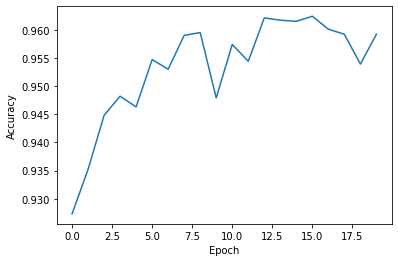

In [7]:
import matplotlib.pyplot as plt

y_values = [0.9273, 0.9352, 0.9448, 0.9482, 0.9463, 0.9547, 0.953, 0.959, 0.9595, 0.9479, 0.9574, 0.9544, 0.9621, 0.9617, 0.9615, 0.9624, 0.9601, 0.9592, 0.9539, 0.9592]

print(max(y_values))

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(y_values)
plt.show()

In [ ]:
## MULTIPLE TEST
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import itertools
import matplotlib.pyplot as plt

# Use MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
test_images = combine_dims(test_images, start=1, count=2)

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=None, dtype='float32')
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=None, dtype='float32')

# Settings
learning_rates = [0.1, 0.01, 0.001]
training_epochs_count=20
batch_sizes=[50, 100, 500]

activation_functions=[tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh]
optimizer_types = [tf.train.AdamOptimizer, tf.train.GradientDescentOptimizer, tf.train.AdagradOptimizer]

display_step=1

#architecture
hidden_layer_size_1=256
hidden_layer_size_2=256
input_size=784
n_classes=10

options = itertools.product(*[learning_rates, batch_sizes, activation_functions, optimizer_types])

for learning_rate, batch_size, activation_function, optimizer_type in options:
  print(learning_rate, batch_size, activation_function, optimizer_type)

  #data input
  x=tf.placeholder(tf.float32, [None, input_size])
  y=tf.placeholder(tf.float32, [None, n_classes])
  #weights
  w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
  w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
  w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))
  #biases
  b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
  b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
  b3=tf.Variable(tf.random_normal([n_classes]))
  #layers
  layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
  layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
  y_predicted=tf.matmul(layer_2, w3)+b3


  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
  optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)

  session=tf.Session();
  session.run(tf.global_variables_initializer())

  correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
  accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

  batches_count=int(len(train_images)/batch_size)
  accuracies = []

  for epoch in range(training_epochs_count):
    for i in range(batches_count):
      batch_x, batch_y = next_batch(train_images, train_labels, i, batch_size)
      batch_x = combine_dims(batch_x, start=1, count=2)
      session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    if ((epoch+1)%display_step==0):
      acc = session.run(accuracy, feed_dict={x: test_images, y: test_labels})
      accuracies.append(acc)
        
  session.close()

  print('Max accuracy:', max(accuracies))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(accuracies)
  plt.show()



| Learning Rate | Batch Size | Activ. Function | Optimizer | Max Accuracy |
| ------------- | ---------- | --------------- | --------- | ------------ |
| 0.1           | 50         | ReLu            | Adam      | 0.137        |
| 0.1           | 50         | Relu            | Gradient  | 0.1029       |
| 0.1           | 50         | ReLu            | AdaGrad   | 0.9445       |
| 0.1           | 50         | Sigmoid         | Adam      | 0.101        |
| 0.1           | 50         | Sigmoid         | Gradient  | 0.8735       |
| 0.1           | 50         | Sigmoid         | AdaGrad   | 0.9144       |
| 0.1           | 50         | Tanh            | Adam      | 0.1135       |
| 0.1           | 50         | Tanh            | Gradient  | 0.6023       |
| 0.1           | 50         | Tanh            | AdaGrad   | 0.879        |
| 0.1           | 100        | ReLu            | Adam      | 0.2029       |
| 0.1           | 100        | Relu            | Gradient  | 0.1135       |
| 0.1           | 100        | ReLu            | AdaGrad   | 0.9416       |
| 0.1           | 100        | Sigmoid         | Adam      | 0.2683       |
| 0.1           | 100        | Sigmoid         | Gradient  | 0.8789       |
| 0.1           | 100        | Sigmoid         | AdaGrad   | 0.9081       |
| 0.1           | 100        | Tanh            | Adam      | 0.1135       |
| 0.1           | 100        | Tanh            | Gradient  | 0.7393       |
| 0.1           | 100        | Tanh            | AdaGrad   | 0.8734       |
| 0.1           | 500        | ReLu            | Adam      | 0.3304       |
| 0.1           | 500        | Relu            | Gradient  | 0.1135       |
| 0.1           | 500        | ReLu            | AdaGrad   | 0.9302       |
| 0.1           | 500        | Sigmoid         | Adam      | 0.4971       |
| 0.1           | 500        | Sigmoid         | Gradient  | 0.8296       |
| 0.1           | 500        | Sigmoid         | AdaGrad   | 0.8709       |
| 0.1           | 500        | Tanh            | Adam      | 0.4911       |
| 0.1           | 500        | Tanh            | Gradient  | 0.7472       |
| 0.1           | 500        | Tanh            | AdaGrad   | 0.8269       |
| 0.01          | 50         | ReLu            | Adam      | 0.9416       |
| 0.01          | 50         | Relu            | Gradient  | 0.098        |
| 0.01          | 50         | ReLu            | AdaGrad   | 0.9212       |
| 0.01          | 50         | Sigmoid         | Adam      | 0.8805       |
| 0.01          | 50         | Sigmoid         | Gradient  | 0.8262       |
| 0.01          | 50         | Sigmoid         | AdaGrad   | 0.8052       |
| 0.01          | 50         | Tanh            | Adam      | 0.7461       |
| 0.01          | 50         | Tanh            | Gradient  | 0.7519       |
| 0.01          | 50         | Tanh            | AdaGrad   | 0.7819       |
| 0.01          | 100        | ReLu            | Adam      | 0.9682       |
| 0.01          | 100        | Relu            | Gradient  | 0.1135       |
| 0.01          | 100        | ReLu            | AdaGrad   | 0.9156       |
| 0.01          | 100        | Sigmoid         | Adam      | 0.8907       |
| 0.01          | 100        | Sigmoid         | Gradient  | 0.7865       |
| 0.01          | 100        | Sigmoid         | AdaGrad   | 0.7802       |
| 0.01          | 100        | Tanh            | Adam      | 0.8136       |
| 0.01          | 100        | Tanh            | Gradient  | 0.7217       |
| 0.01          | 100        | Tanh            | AdaGrad   | 0.7726       |
| 0.01          | 500        | ReLu            | Adam      | 0.9673       |
| 0.01          | 500        | Relu            | Gradient  | 0.098        |
| 0.01          | 500        | ReLu            | AdaGrad   | 0.9118       |
| 0.01          | 500        | Sigmoid         | Adam      | 0.9169       |
| 0.01          | 500        | Sigmoid         | Gradient  | 0.5965       |
| 0.01          | 500        | Sigmoid         | AdaGrad   | 0.6958       |
| 0.01          | 500        | Tanh            | Adam      | 0.8885       |
| 0.01          | 500        | Tanh            | Gradient  | 0.6524       |
| 0.01          | 500        | Tanh            | AdaGrad   | 0.6935       |
| 0.001         | 50         | ReLu            | Adam      | 0.9585       |
| 0.001         | 50         | Relu            | Gradient  | 0.098        |
| 0.001         | 50         | ReLu            | AdaGrad   | 0.8008       |
| 0.001         | 50         | Sigmoid         | Adam      | 0.9279       |
| 0.001         | 50         | Sigmoid         | Gradient  | 0.6241       |
| 0.001         | 50         | Sigmoid         | AdaGrad   | 0.5212       |
| 0.001         | 50         | Tanh            | Adam      | 0.8908       |
| 0.001         | 50         | Tanh            | Gradient  | 0.6658       |
| 0.001         | 50         | Tanh            | AdaGrad   | 0.4097       |
| 0.001         | 100        | ReLu            | Adam      | 0.9523       |
| 0.001         | 100        | Relu            | Gradient  | 0.103        |
| 0.001         | 100        | ReLu            | AdaGrad   | 0.7716       |
| 0.001         | 100        | Sigmoid         | Adam      | 0.9212       |
| 0.001         | 100        | Sigmoid         | Gradient  | 0.4953       |
| 0.001         | 100        | Sigmoid         | AdaGrad   | 0.415        |
| 0.001         | 100        | Tanh            | Adam      | 0.8748       |
| 0.001         | 100        | Tanh            | Gradient  | 0.5969       |
| 0.001         | 100        | Tanh            | AdaGrad   | 0.3963       |
| 0.001         | 500        | ReLu            | Adam      | 0.9295       |
| 0.001         | 500        | Relu            | Gradient  | 0.098        |
| 0.001         | 500        | ReLu            | AdaGrad   | 0.7086       |
| 0.001         | 500        | Sigmoid         | Adam      | 0.8743       |
| 0.001         | 500        | Sigmoid         | Gradient  | 0.2169       |
| 0.001         | 500        | Sigmoid         | AdaGrad   | 0.2013       |
| 0.001         | 500        | Tanh            | Adam      | 0.8234       |
| 0.001         | 500        | Tanh            | Gradient  | 0.328        |
| 0.001         | 500        | Tanh            | AdaGrad   | 0.2794       |


Ordered by accuracy:

| Learning Rate | Batch Size | Activ. Function | Optimizer | Max Accuracy |
| ------------- | ---------- | --------------- | --------- | ------------ |
| 0.01          | 100        | ReLu            | Adam      | 0.9682       |
| 0.01          | 500        | ReLu            | Adam      | 0.9673       |
| 0.001         | 50         | ReLu            | Adam      | 0.9585       |
| 0.001         | 100        | ReLu            | Adam      | 0.9523       |
| 0.1           | 50         | ReLu            | AdaGrad   | 0.9445       |
| 0.1           | 100        | ReLu            | AdaGrad   | 0.9416       |
| 0.01          | 50         | ReLu            | Adam      | 0.9416       |
| 0.1           | 500        | ReLu            | AdaGrad   | 0.9302       |
| 0.001         | 500        | ReLu            | Adam      | 0.9295       |
| 0.001         | 50         | Sigmoid         | Adam      | 0.9279       |
| 0.01          | 50         | ReLu            | AdaGrad   | 0.9212       |
| 0.001         | 100        | Sigmoid         | Adam      | 0.9212       |
| 0.01          | 500        | Sigmoid         | Adam      | 0.9169       |
